# Objective

Investigate ways to sort "putatively incorrect" clusters (clusters with few unique workers annotating) based on fraction of workers who find a lot of clusters which a lot of other workers also find.

# Notes 20180727

**Preliminary takeaways** Visually, the separation between correct and incorrect clusters is sometimes good. Perhaps separation would be improved if we found a better threshold to sort the Good Crowd of workers (workers who participate in a lot of big clusters)? 

**To do:** Need to find a better threshold. K-means performs a lot better than Otsu’s but still keeps too many clusters with low fractions of workers from the good crowd. See notebook for histograms: number of “putatively incorrect” clusters vs. fraction of the cluster’s annotations which are from workers who are in many “putatively correct” clusters. The list should contain, for each “putatively incorrect” cluster, the fraction of the cluster’s annotations which are from workers who are in many “putatively correct” clusters.

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation

worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = False
img_height = 300
clustering_params = ['AffinityPropagation', -350]
pairwise_threshold = 1

show_correctness = True
correctness_threshold = 4

# Plots
Grouped by:
- background
    - number of spots
        - mean SNR

## Background: Tissue

In [2]:
json_filename = 'SynthTests_tissue.json'
gen_date = '20180719'
bg_type = 'tissue'

## Tissue, 50 spots

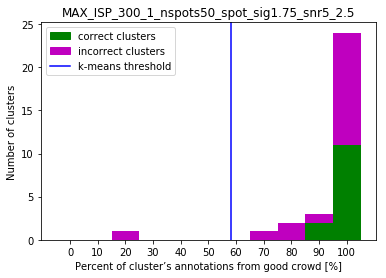

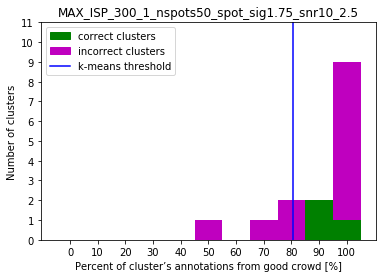

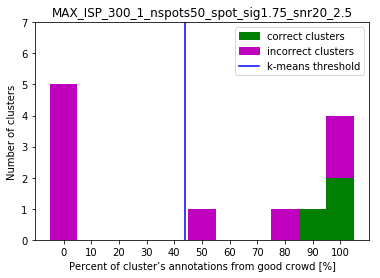

In [3]:
img_names = ['MAX_ISP_300_1_nspots50_spot_sig1.75_snr5_2.5',
             'MAX_ISP_300_1_nspots50_spot_sig1.75_snr10_2.5',
             'MAX_ISP_300_1_nspots50_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(small_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

## Tissue, 100 spots
This cell gets stuck on Otsu's; need to debug.

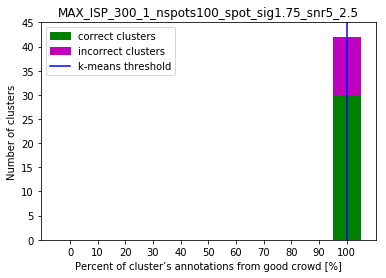

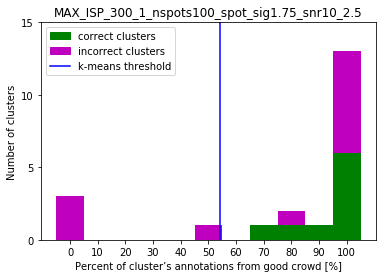

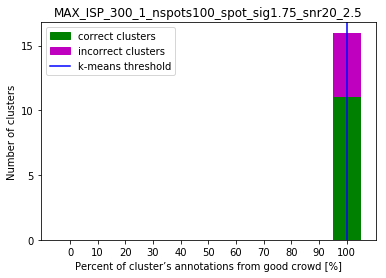

In [4]:
img_names = ['MAX_ISP_300_1_nspots100_spot_sig1.75_snr5_2.5',
             'MAX_ISP_300_1_nspots100_spot_sig1.75_snr10_2.5',
             'MAX_ISP_300_1_nspots100_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(small_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

## Tissue, 150 spots

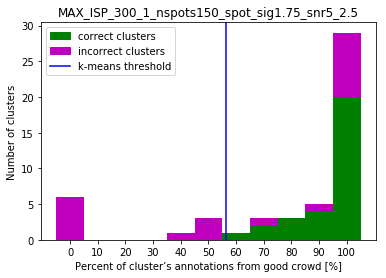

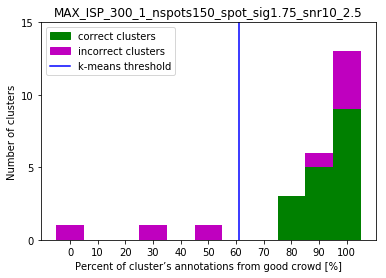

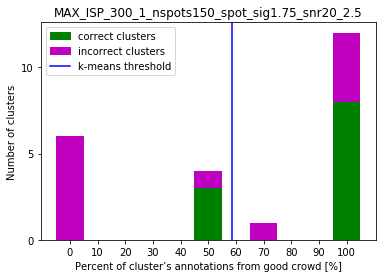

In [5]:
img_names = ['MAX_ISP_300_1_nspots150_spot_sig1.75_snr5_2.5',
             'MAX_ISP_300_1_nspots150_spot_sig1.75_snr10_2.5',
             'MAX_ISP_300_1_nspots150_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(small_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

# Background: Cells

In [6]:
json_filename = 'SynthData_cells.json'
gen_date = '20180719'
bg_type = 'cells'

## Cells, 50 spots
Second two images get stuck on Otsu's, need to debug.

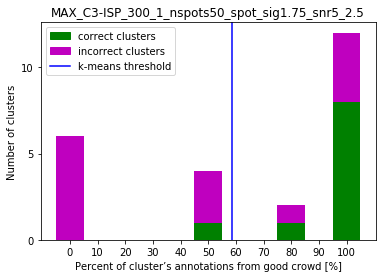

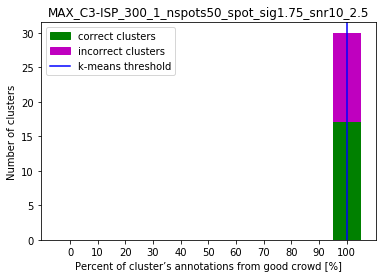

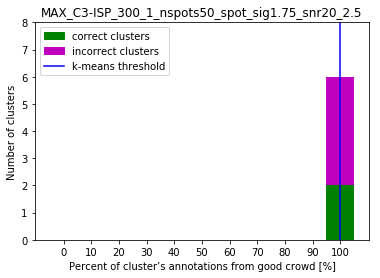

In [7]:
img_names = ['MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr10_2.5',
             'MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(small_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

## Cells, 100 spots

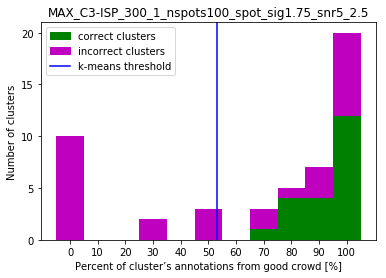

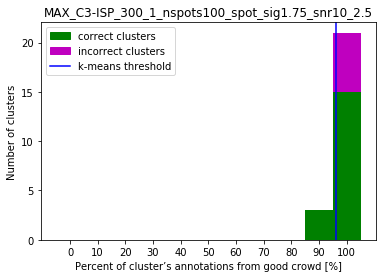

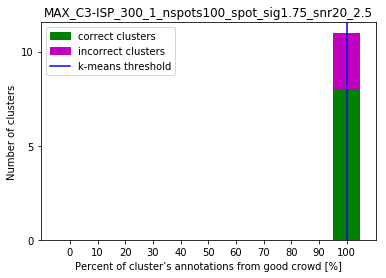

In [8]:
img_names = ['MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr10_2.5',
             'MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(small_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

## Cells, 150 spots

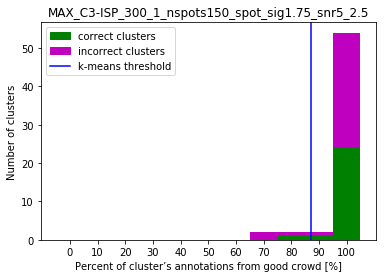

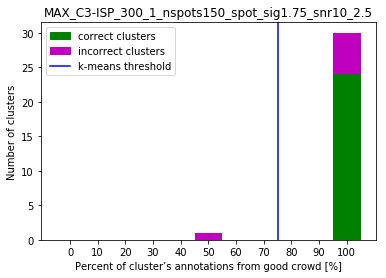

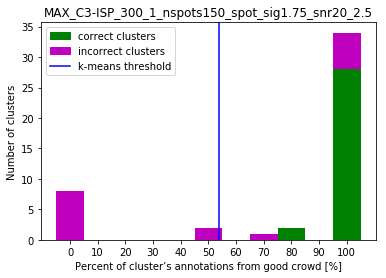

In [9]:
img_names = ['MAX_C3-ISP_300_1_nspots150_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots150_spot_sig1.75_snr10_2.5',
             'MAX_C3-ISP_300_1_nspots150_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(small_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)